<a href="https://colab.research.google.com/github/Epictunarak/VGG19-for-predict-superstar/blob/main/VGG19DLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install split-folders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
import splitfolders

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19

In [ ]:
!unzip "/content/drive/MyDrive/Dataset_ProjectDL_G.4"

unzip:  cannot find or open /content/drive/MyDrive/Dataset_ProjectDL_G.4, /content/drive/MyDrive/Dataset_ProjectDL_G.4.zip or /content/drive/MyDrive/Dataset_ProjectDL_G.4.ZIP.


In [ ]:
num_classes = 5
IMAGE_SHAPE = [224,224]
batch_size = 32
epochs = 30

In [ ]:
base_model = VGG19(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in base_model.layers:
  layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

80134624/80134624 [==============================] - 2s 0us/step


In [ ]:
dataset = "/content/drive/MyDrive/Dataset_ProjectDL_G.4"

In [ ]:
splitfolders.ratio(dataset,seed=1337, output="Splitted", ratio=(0.6,0.2,0.2))

Copying files: 154 files [01:38,  1.57 files/s]


In [ ]:
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(directory= "Splitted/train",target_size=(224,224),
                                           shuffle = False, class_mode ='categorical')
trdata = ImageDataGenerator()
test_data_gen = trdata.flow_from_directory(directory= "Splitted/test",target_size=(224,224),
                                           shuffle = False, class_mode ='categorical')

Found 89 images belonging to 5 classes.
Found 33 images belonging to 5 classes.


In [ ]:
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
history = model.fit(train_data_gen, steps_per_epoch = training_steps_per_epoch,
                  validation_data = test_data_gen, validation_steps = validation_steps_per_epoch,
                  epochs = epochs, verbose = 1)
print('Training Completed')

Epoch 1/30
3/3 [==============================] - 19s 4s/step - loss: 23.7695 - accuracy: 0.4831 - val_loss: 10.0700 - val_accuracy: 0.6970
Epoch 2/30
3/3 [==============================] - 2s 848ms/step - loss: 16.3853 - accuracy: 0.6966 - val_loss: 14.9006 - val_accuracy: 0.7576
Epoch 3/30
3/3 [==============================] - 2s 708ms/step - loss: 8.8269 - accuracy: 0.7753 - val_loss: 8.6922 - val_accuracy: 0.7576
Epoch 4/30
3/3 [==============================] - 2s 760ms/step - loss: 10.2995 - accuracy: 0.7865 - val_loss: 5.0541 - val_accuracy: 0.7576
Epoch 5/30
3/3 [==============================] - 2s 463ms/step - loss: 10.0007 - accuracy: 0.8202 - val_loss: 6.5324 - val_accuracy: 0.7273
Epoch 6/30
3/3 [==============================] - 2s 733ms/step - loss: 7.5751 - accuracy: 0.8202 - val_loss: 8.2730 - val_accuracy: 0.7576
Epoch 7/30
3/3 [==============================] - 2s 918ms/step - loss: 2.8987 - accuracy: 0.9213 - val_loss: 9.3592 - val_accuracy: 0.7576
Epoch 8/30
3/3 [

THe most accuracy = 96.59%

In [ ]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print('Final Training Accuracy:', train_accuracy)
print('Final Validation Accuracy:', val_accuracy)

Final Training Accuracy: 0.9550561904907227
Final Validation Accuracy: 0.8181818127632141


In [ ]:
keras_file = "MockModelVGG19.h5"
tf.keras.models.save_model(model,keras_file)

<ipython-input-12-0237a798d0ff>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,keras_file)


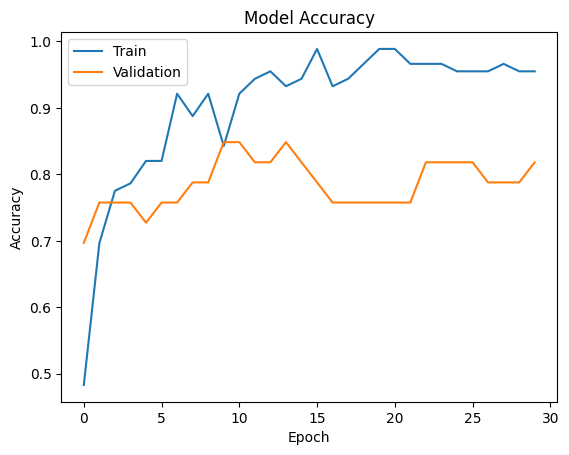

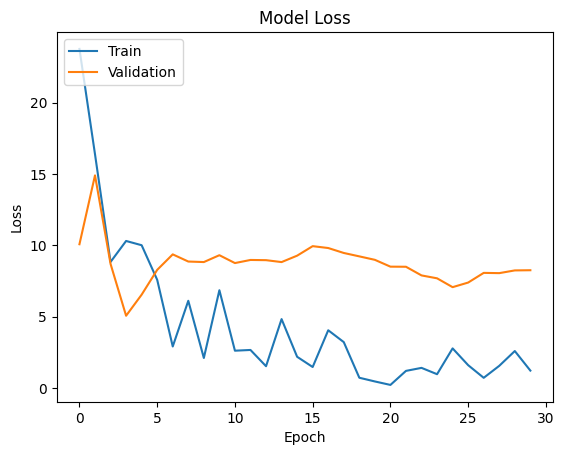

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [ ]:
%pip install scikit-learn
%pip install pretty-confusion-matrix --no-deps

2/2 [==============================] - 1s 176ms/step


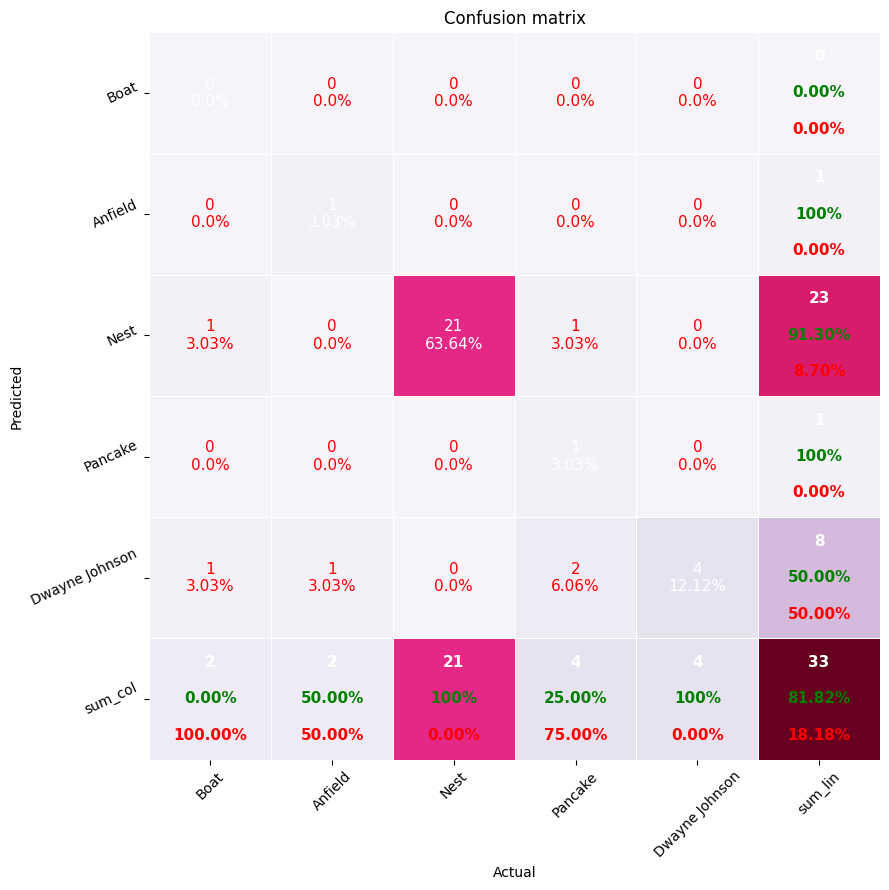

In [ ]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis = 1)
val_trues = test_data_gen.classes

from pretty_confusion_matrix import pp_matrix_from_data

cmap = 'PuRd'
pp_matrix_from_data(val_trues, val_preds,
                   columns = ['Boat', 'Anfield', 'Nest', 'Pancake', 'Dwayne Johnson'], cmap = cmap)

In [ ]:
class_name = ['Boat', 'Anfield', 'Nest', 'Pancake', 'Dwayne Johnson']

In [ ]:
def Single_Image_Prediction(file):
    image_size = (224,224)
    img = tf.keras.preprocessing.image.load_img(
        file, target_size=image_size)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.axis('off')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #create batch axis

    predictions = model.predict(img_array)
    print(class_name[np.argmax(predictions[0])])

1/1 [==============================] - 0s 321ms/step
Dwayne Johnson


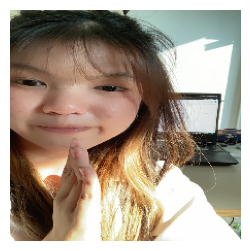

In [ ]:
Single_Image_Prediction("/content/drive/MyDrive/Dataset_ProjectDL_G.4/Anfield/Anfield_03.JPG")

1/1 [==============================] - 0s 60ms/step
Nest


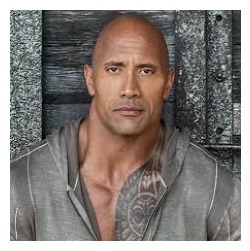

In [ ]:
Single_Image_Prediction("/content/Splitted/test/Dwayne Johnson/Dwayne_J_13.jpg")

1/1 [==============================] - 0s 19ms/step
Anfield


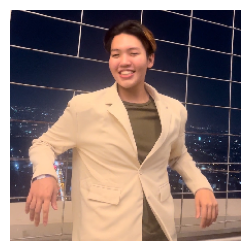

In [ ]:
Single_Image_Prediction("/content/Splitted/train/Boat/Boat1.JPG")

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl 

In [ ]:
pip install h5py

In [ ]:
import gradio as gr
import tensorflow as tf
import requests
from termcolor import colored
import cv2
import h5py
from PIL import Image
import numpy as np
import os
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import load_model

In [ ]:

model.save('/content/drive/MyDrive/Dataset_ProjectDL_G.4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('/content/drive/MyDrive/Dataset_ProjectDL_G.4.h5')

class_name = ['Boat','Nest','Pancake','Anfield','Dwayne Johnson']
num_classes = len(class_name)

response = requests.get('https://git.io/JJkYN')
labels = class_name
def classify_image(inp):
    inp = cv2.resize(inp, (224,224), interpolation = cv2.INTER_AREA).reshape((-1, 224, 224, 3))
    inp = tf.keras.applications.vgg16.preprocess_input(inp)

    prediction = model.predict(inp).flatten()

    confidences = {labels[i]: float(prediction[i]) for i in range(num_classes)}

    return confidences

In [ ]:
ex = ['/content/drive/MyDrive/Dataset_ProjectDL_G.4/Boat/Boat1.JPG',
      '/content/drive/MyDrive/Dataset_ProjectDL_G.4/Anfield/Anfield_01.jpeg',
      '/content/drive/MyDrive/Dataset_ProjectDL_G.4/Dwayne Johnson/Dwayne_J_04.jpg',
      '/content/drive/MyDrive/Dataset_ProjectDL_G.4/Nest/Nest_04.jpg',
      '/content/drive/MyDrive/Dataset_ProjectDL_G.4/Pancake/Pancake05.jpg']
txt_article = 'Textures'
txt_title = 'Kittisorn_6405626'
description = 'Texture'

gr.Interface(fn=classify_image,
            inputs=gr.Image(),
            outputs=gr.Label(num_top_classes=5),
            article = txt_article,
            title = txt_title,
            description=description,
            examples=ex).launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b0f582d4d7188a602f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
